In [1]:
import pandas as pd
import string
import re
import nltk
from nltk.corpus import stopwords

In [2]:
rawData = open('SMSSpamCollection.tsv').read()

In [3]:
rawData[0:500]

"ham\tI've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.\nspam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\nham\tNah I don't think he goes to usf, he lives around here though\nham\tEven my brother is not like to speak with me. They treat me like aid"

In [4]:
parsedData = rawData.replace('\t','\n').split('\n')
parsedData[0:5]

['ham',
 "I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.",
 'spam',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'ham']

In [5]:
labels = parsedData[0::2]

In [6]:
labels[0:5]

['ham', 'spam', 'ham', 'ham', 'ham']

In [7]:
data = parsedData[1::2]

In [8]:
data[0:5]

["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.",
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 "Nah I don't think he goes to usf, he lives around here though",
 'Even my brother is not like to speak with me. They treat me like aids patent.',
 'I HAVE A DATE ON SUNDAY WITH WILL!!']

In [9]:
print(len(labels))
print(len(data))


5571
5570


In [10]:
labels[-5:]

['ham', 'ham', 'ham', 'ham', '']

In [11]:
db = pd.DataFrame({'label':labels[:-1],
                   'data':data
    
})

In [12]:
db.head()

,label,data
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [13]:
dtext = pd.read_csv('SMSSpamCollection.tsv',sep='\t',header= None)


In [14]:
dtext.columns = ['label','data']
raw_dtext = dtext
dtext.head()

,label,data
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [15]:
print("Input has {} rows and {} columns".format(len(dtext),len(dtext.columns)))

Input has 5568 rows and 2 columns


In [16]:
print("No of ham texts are {} and spam text are {}".format(len(dtext[dtext['label']=='ham']),
                                                           len(dtext[dtext['label']=='spam'])))

No of ham texts are 4822 and spam text are 746


In [17]:
print("No of missing labels {}".format(dtext['label'].isnull().sum()))
print("No of missing data {}".format(dtext['data'].isnull().sum()))

No of missing labels 0
No of missing data 0


# Clean data - Remove Punctuation, Tokenize, Stopword Removal,Stemming

In [18]:
#string.punctuation
stopword = stopwords.words('english')
ps = nltk.PorterStemmer()
wn = nltk.WordNetLemmatizer()

def clean_data(text):
    text_nopunc = "".join([char for char in text  if char not in string.punctuation])
    tokens = re.split('\W+',text_nopunc) #'\W+' indicates non word character
    text_stemmed = [ps.stem(word) for word in tokens if word not in stopword]
    #text_lemma = [wn.lemmatize(word) for word in text] #lemmatization
    return text_stemmed

dtext['cleaned_data'] = dtext['data'].apply(lambda x: clean_data(x.lower()))
dtext.head()

,label,data,cleaned_data
0,ham,I've been searching for the right words to tha...,"[ive, search, right, word, thank, breather, pr..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, dont, think, goe, usf, live, around, tho..."
3,ham,Even my brother is not like to speak with me. ...,"[even, brother, like, speak, treat, like, aid,..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]"


# Apply Count Vectorizer

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(analyzer = clean_data)
x_count = count_vect.fit_transform(dtext['data'])
print(x_count.shape)
print(count_vect.get_feature_names())

(5568, 8337)
['', '0', '008704050406', '0089mi', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700621170150p'

# Apply Count Vectorizer( W/ N grams)

In [20]:
#string.punctuation
stopword = stopwords.words('english')
ps = nltk.PorterStemmer()
wn = nltk.WordNetLemmatizer()

def clean_data_ngram(text):
    text_nopunc = "".join([char for char in text  if char not in string.punctuation])
    tokens = re.split('\W+',text_nopunc) #'\W+' indicates non word character
    text_stemmed = " ".join([ps.stem(word) for word in tokens if word not in stopword])
    #text_lemma = [wn.lemmatize(word) for word in text] #lemmatization
    return text_stemmed

dtext['cleaned_data_gram'] = dtext['data'].apply(lambda x: clean_data_ngram(x.lower()))
dtext.head()

,label,data,cleaned_data,cleaned_data_gram
0,ham,I've been searching for the right words to tha...,"[ive, search, right, word, thank, breather, pr...",ive search right word thank breather promis wo...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entri, 2, wkli, comp, win, fa, cup, fin...",free entri 2 wkli comp win fa cup final tkt 21...
2,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, dont, think, goe, usf, live, around, tho...",nah dont think goe usf live around though
3,ham,Even my brother is not like to speak with me. ...,"[even, brother, like, speak, treat, like, aid,...",even brother like speak treat like aid patent
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]",date sunday


In [21]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect_ngram = CountVectorizer(ngram_range=(2,2))
x_count_ngram = count_vect_ngram.fit_transform(dtext['cleaned_data_gram'])
print(x_count_ngram.shape)

print(count_vect_ngram.get_feature_names())

(5568, 31275)
['008704050406 sp', '0089mi last', '0121 2025050', '01223585236 xx', '01223585334 cum', '0125698789 ring', '02 user', '020603 2nd', '0207 153', '02072069400 bx', '02073162414 cost', '02085076972 repli', '020903 2nd', '021 3680', '021 3680offer', '050703 tcsbcm4235wc1n3xx', '06 good', '07046744435 arrang', '07090298926 reschedul', '07099833605 reschedul', '07123456789 87077', '0721072 find', '07732584351 rodger', '07734396839 ibh', '07742676969 show', '07753741225 show', '0776xxxxxxx uve', '077xxx 2000', '07801543489 guarante', '07808 xxxxxx', '07808247860 show', '07808726822 award', '07815296484 show', '0784987 show', '0789xxxxxxx today', '0796xxxxxx today', '07973788240 show', '07xxxxxxxxx 2000', '07xxxxxxxxx show', '0800 0721072', '0800 169', '0800 18', '0800 195', '0800 1956669', '0800 505060', '0800 542', '08000407165 18', '08000776320 repli', '08000839402 2stoptx', '08000839402 2stoptxt', '08000839402 call', '08000839402 call2optout4qf2', '08000839402 call2optoutf4q'

In [22]:
dtext_sample = dtext[0:1]
count_vect_sample = CountVectorizer(ngram_range=(2,2))
x_count_sample = count_vect_sample.fit_transform(dtext_sample['cleaned_data_gram'])
print(x_count_sample.shape)

print(count_vect_sample.get_feature_names())

(1, 15)
['bless time', 'breather promis', 'fulfil promis', 'grant fulfil', 'help grant', 'ive search', 'promis wonder', 'promis wont', 'right word', 'search right', 'take help', 'thank breather', 'wonder bless', 'wont take', 'word thank']


In [23]:
pd.set_option('display.max_colwidth', -1)
print(str(dtext_sample['cleaned_data_gram']))

0    ive search right word thank breather promis wont take help grant fulfil promis wonder bless time
Name: cleaned_data_gram, dtype: object


# Apply TFidfVectorizer

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
count_vect_tfidf = TfidfVectorizer(analyzer = clean_data)
x_tfidf = count_vect_tfidf.fit_transform(dtext['data'])
print(x_tfidf.shape)
print(count_vect_tfidf.get_feature_names())


(5568, 8337)
['', '0', '008704050406', '0089mi', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700621170150p'

# Feature Engineering - Feature Creation

## 1. Message length

In [25]:
raw_dtext['data_len'] = raw_dtext['data'].apply(lambda x: len(x) - x.count(" ")) #length of each SMS
raw_dtext.head()

,label,data,cleaned_data,cleaned_data_gram,data_len
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.,"[ive, search, right, word, thank, breather, promis, wont, take, help, grant, fulfil, promis, wonder, bless, time]",ive search right word thank breather promis wont take help grant fulfil promis wonder bless time,160
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,"[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv, entri, questionstd, txt, ratetc, appli, 08452810075over18]",free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd txt ratetc appli 08452810075over18,128
2,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goe, usf, live, around, though]",nah dont think goe usf live around though,49
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[even, brother, like, speak, treat, like, aid, patent]",even brother like speak treat like aid patent,62
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]",date sunday,28


## 2. Percentage of punctuation

In [26]:
def per_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")),3)*100

raw_dtext['percent_punct'] = raw_dtext['data'].apply(lambda x: per_punct(x))
raw_dtext.head()

,label,data,cleaned_data,cleaned_data_gram,data_len,percent_punct
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.,"[ive, search, right, word, thank, breather, promis, wont, take, help, grant, fulfil, promis, wonder, bless, time]",ive search right word thank breather promis wont take help grant fulfil promis wonder bless time,160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,"[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv, entri, questionstd, txt, ratetc, appli, 08452810075over18]",free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd txt ratetc appli 08452810075over18,128,4.7
2,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goe, usf, live, around, though]",nah dont think goe usf live around though,49,4.1
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[even, brother, like, speak, treat, like, aid, patent]",even brother like speak treat like aid patent,62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]",date sunday,28,7.1


In [27]:
dtext['data_len'].max()

740

# Feature Evaluation

In [28]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

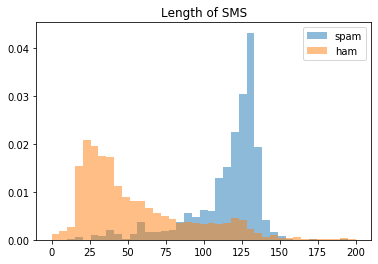

In [29]:
bins = np.linspace(0,200,40)
pyplot.hist(dtext[dtext['label']=='spam']['data_len'],bins,alpha = 0.5,density=True, label = 'spam')
pyplot.hist(dtext[dtext['label']=='ham']['data_len'],bins,alpha = 0.5,density=True, label = 'ham')
pyplot.title('Length of SMS')
pyplot.legend(loc='upper right')
pyplot.show()

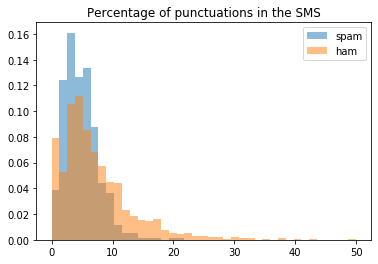

In [30]:
bins = np.linspace(0,50,40)
pyplot.hist(dtext[dtext['label']=='spam']['percent_punct'],bins,alpha = 0.5,density=True, label = 'spam')
pyplot.hist(dtext[dtext['label']=='ham']['percent_punct'],bins,alpha = 0.5,density=True, label = 'ham')
pyplot.title('Percentage of punctuations in the SMS')
pyplot.legend(loc='upper right')
pyplot.show()

## Plot two new features

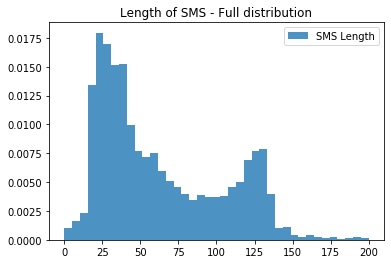

In [31]:
bins = np.linspace(0,200,40)
pyplot.hist(dtext['data_len'],bins,alpha = 0.8,density=True,label='SMS Length')
pyplot.title('Length of SMS - Full distribution')
pyplot.legend(loc='upper right')
pyplot.show()

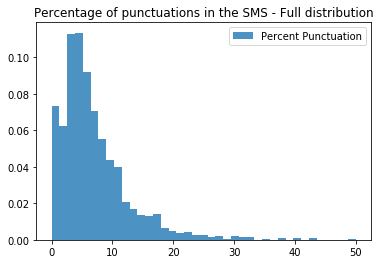

In [32]:
bins = np.linspace(0,50,40)
pyplot.hist(dtext['percent_punct'],bins,alpha = 0.8,density=True,label='Percent Punctuation')
pyplot.title('Percentage of punctuations in the SMS - Full distribution')
pyplot.legend(loc='upper right')
pyplot.show()

# Feature Transformation

## Applying transformation - Box Cox Transformation

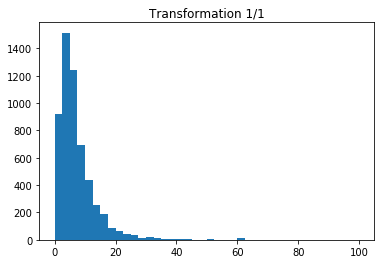

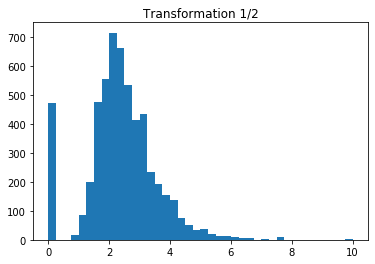

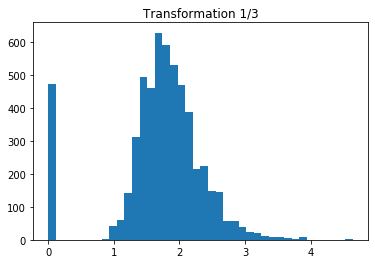

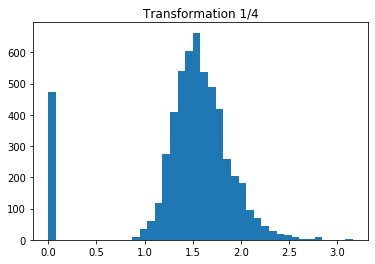

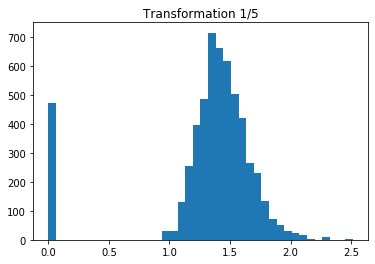

In [33]:
for i in [1,2,3,4,5]:
    pyplot.hist((dtext['percent_punct'])**(1/i),bins=40)
    pyplot.title('Transformation 1/{}'.format(str(i)))
    pyplot.show()

# Building the Model - Random Forest

In [34]:
X_features = pd.concat([dtext['data_len'],dtext['percent_punct'],pd.DataFrame(x_tfidf.toarray())],axis=1)
print(X_features.head())
X_count_features = pd.concat([dtext['data_len'],dtext['percent_punct'],pd.DataFrame(x_count.toarray())],axis=1)
print(X_count_features.head())

   data_len  percent_punct    0    1    2    3    4    5    6    7  ...  8327  \
0  160       2.5            0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0    
1  128       4.7            0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0    
2  49        4.1            0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0    
3  62        3.2            0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0    
4  28        7.1            0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0    

   8328  8329  8330  8331  8332  8333  8334  8335  8336  
0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

[5 rows x 8339 columns]
   data_len  percent_punct  0  1  2  3  4  5  6  7  ...  8327  8328  8329  \
0  160       2.5            0  0  0  0  0  0  0  0  ...  0     

## Explore RandomForestClassifier Attributes and Hyperparameters

In [35]:
from sklearn.ensemble import RandomForestClassifier
print(dir(RandomForestClassifier()))
print(RandomForestClassifier())

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_estimator_type', '_get_param_names', '_get_tags', '_make_estimator', '_more_tags', '_required_parameters', '_set_oob_score', '_validate_X_predict', '_validate_estimator', '_validate_y_class_weight', 'apply', 'base_estimator', 'bootstrap', 'class_weight', 'criterion', 'decision_path', 'estimator_params', 'feature_importances_', 'fit', 'get_params', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_sco

## Explore RandomForestClassifier through Cross Validation

In [36]:
from sklearn.model_selection import KFold, cross_val_score

rf = RandomForestClassifier(n_jobs=-1)
k_fold = KFold(n_splits=5)
cross_val_score(rf, X_features, dtext['label'],cv = k_fold, scoring = 'accuracy',n_jobs = -1)

array([0.96947935, 0.96588869, 0.96768402, 0.96136568, 0.96765499])

## Explore RandomForestClassifier through Hold out set

In [37]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X_features,dtext['label'],test_size = 0.2)

In [38]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 50, max_depth = 20, n_jobs = -1)
rf_model =rf.fit(x_train, y_train)


In [39]:
sorted(zip(rf_model.feature_importances_,x_train.columns),reverse = True)

[(0.0445127096691785, 'data_len'),
 (0.03666876910922198, 5945),
 (0.03321133765717999, 3349),
 (0.03132203894999189, 2017),
 (0.02586764059782993, 5009),
 (0.02409431812684301, 2244),
 (0.023539759897388976, 6965),
 (0.01654970196536387, 392),
 (0.016006198352973126, 7247),
 (0.015863008714048454, 397),
 (0.013089252908155626, 2384),
 (0.012069100959291456, 3658),
 (0.011974499303853525, 1112),
 (0.011938227808127793, 2511),
 (0.011920795222892775, 6503),
 (0.011342938615732162, 7577),
 (0.011111466838142242, 695),
 (0.01011429317352311, 1081),
 (0.009791106889740674, 7818),
 (0.00974668536624166, 1572),
 (0.008716064434076055, 294),
 (0.008301238479415185, 2155),
 (0.008164155812015185, 1022),
 (0.008113178209758813, 7689),
 (0.00794823066740064, 4947),
 (0.007744524083765866, 5337),
 (0.0074837791158447456, 4485),
 (0.007305218645380106, 6207),
 (0.007017267902918415, 375),
 (0.006850986866425311, 5294),
 (0.006688007859825398, 'percent_punct'),
 (0.006419516955968819, 7922),
 (0.00

In [40]:
y_pred = rf_model.predict(x_test)
precision,recall,fscore,support = score(y_test,y_pred, pos_label = 'spam', average='binary')
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision,3),
                                                         round(recall,3),
                                                         round(((y_test==y_pred).sum()/len(y_pred)),3)))

Precision: 1.0 / Recall: 0.512 / Accuracy: 0.928


## Random Forest with Grid Search

In [41]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

x_train,x_test,y_train,y_test = train_test_split(X_features,dtext['label'],test_size = 0.2)

In [42]:
def run_model(n_est,depth):
    rf = RandomForestClassifier(n_estimators = n_est, max_depth = depth, n_jobs = -1)
    rf_model =rf.fit(x_train, y_train)
    y_pred = rf_model.predict(x_test)
    precision,recall,fscore,support = score(y_test,y_pred, pos_label = 'spam', average='binary')
    print('Est: {} / Depth: {} ------ Precision: {} / Recall: {} / Accuracy: {}'.format(n_est,depth,round(precision,3),
                                                         round(recall,3),
                                                         round(((y_test==y_pred).sum()/len(y_pred)),3)))
    

In [43]:
for n_est in [10,30,50,100]:
    for depth in [10,20,30,None]:
        run_model(n_est,depth)

Est: 10 / Depth: 10 ------ Precision: 1.0 / Recall: 0.294 / Accuracy: 0.909
Est: 10 / Depth: 20 ------ Precision: 1.0 / Recall: 0.469 / Accuracy: 0.932
Est: 10 / Depth: 30 ------ Precision: 1.0 / Recall: 0.734 / Accuracy: 0.966
Est: 10 / Depth: None ------ Precision: 1.0 / Recall: 0.804 / Accuracy: 0.975
Est: 30 / Depth: 10 ------ Precision: 1.0 / Recall: 0.252 / Accuracy: 0.904
Est: 30 / Depth: 20 ------ Precision: 1.0 / Recall: 0.594 / Accuracy: 0.948
Est: 30 / Depth: 30 ------ Precision: 1.0 / Recall: 0.657 / Accuracy: 0.956
Est: 30 / Depth: None ------ Precision: 1.0 / Recall: 0.804 / Accuracy: 0.975
Est: 50 / Depth: 10 ------ Precision: 1.0 / Recall: 0.224 / Accuracy: 0.9
Est: 50 / Depth: 20 ------ Precision: 1.0 / Recall: 0.58 / Accuracy: 0.946
Est: 50 / Depth: 30 ------ Precision: 1.0 / Recall: 0.706 / Accuracy: 0.962
Est: 50 / Depth: None ------ Precision: 1.0 / Recall: 0.797 / Accuracy: 0.974
Est: 100 / Depth: 10 ------ Precision: 1.0 / Recall: 0.238 / Accuracy: 0.902
Est: 100

## Exploring Parameter setting using GridSearchCV - Hyper parameter tuning/Cross Validation

### TFIDF Vectorized data

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [45]:
rf = RandomForestClassifier()
param = {'n_estimators':[10,150,300],
         'max_depth' : [30,60,90,None]}
gs = GridSearchCV(rf, param, cv =5, n_jobs=-1)
gs_fit = gs.fit(X_features,dtext['label'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score',ascending = False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,22.601494,0.658054,0.312497,0.029881,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.977578,0.978456,0.974843,0.969452,0.973046,0.974677,0.003246,1
11,37.853727,0.617892,0.253181,0.037793,None,300,"{'max_depth': None, 'n_estimators': 300}",0.978475,0.974865,0.974843,0.967655,0.973046,0.973779,0.003533,2
10,23.286336,1.019441,0.281164,0.051684,None,150,"{'max_depth': None, 'n_estimators': 150}",0.975785,0.973968,0.974843,0.967655,0.975741,0.973599,0.003045,3
6,2.542176,0.075005,0.143680,0.017529,90,10,"{'max_depth': 90, 'n_estimators': 10}",0.977578,0.971275,0.974843,0.966757,0.976640,0.973420,0.003967,4
8,44.185073,0.370324,0.454716,0.047073,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.974888,0.977558,0.974843,0.966757,0.973046,0.973420,0.003629,4


### CountVectorized Data

In [46]:
rf = RandomForestClassifier()
param = {'n_estimators':[10,150,300],
         'max_depth' : [30,60,90,None]}
gs = GridSearchCV(rf, param, cv =5, n_jobs=-1)
gs_fit = gs.fit(X_count_features,dtext['label'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score',ascending = False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,26.173135,0.205291,0.453606,0.113193,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.975785,0.974865,0.974843,0.971249,0.972147,0.973779,0.001755,1
8,49.055237,0.495625,0.597715,0.096316,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.976682,0.975763,0.974843,0.966757,0.972147,0.973240,0.003578,2
3,3.490052,0.227924,0.185806,0.020800,60,10,"{'max_depth': 60, 'n_estimators': 10}",0.975785,0.980251,0.971249,0.969452,0.966757,0.972701,0.004786,3
5,41.837705,0.537963,0.545257,0.157936,60,300,"{'max_depth': 60, 'n_estimators': 300}",0.976682,0.973968,0.973944,0.965858,0.973046,0.972701,0.003631,3
10,26.282817,0.783423,0.353923,0.070994,None,150,"{'max_depth': None, 'n_estimators': 150}",0.976682,0.974865,0.973944,0.966757,0.971249,0.972701,0.003450,3


# Exploring GradientBoostingClassifier attributes and hyperparameters

In [47]:
from sklearn.ensemble import GradientBoostingClassifier

print(dir(GradientBoostingClassifier))
print(GradientBoostingClassifier())

['_SUPPORTED_LOSS', '__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_check_initialized', '_check_params', '_clear_state', '_estimator_type', '_fit_stage', '_fit_stages', '_get_param_names', '_get_tags', '_init_state', '_is_initialized', '_make_estimator', '_raw_predict', '_raw_predict_init', '_required_parameters', '_resize_state', '_staged_raw_predict', '_validate_estimator', '_validate_y', 'apply', 'decision_function', 'feature_importances_', 'fit', 'get_params', 'predict', 'predict_log_proba', 'predict_proba', 'score', 'set_params', 'staged_decision_function', 'staged_predict', 'staged_p

## Build our own Search Grid

In [48]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_features,dtext['label'],test_size = 0.2)

In [49]:
def run_model_gb(n_est,depth,lr):
    gbs = GradientBoostingClassifier(n_estimators = n_est, max_depth = depth,learning_rate=lr)
    gbs_model =gbs.fit(x_train, y_train)
    y_pred = gbs_model.predict(x_test)
    precision,recall,fscore,support = score(y_test,y_pred, pos_label = 'spam', average='binary')
    print('Est: {} / Depth: {} / Learning Rate: {}  ------ Precision: {} / Recall: {} / Accuracy: {}'.format(n_est,
                                                                                                             depth,
                                                                                                             lr,
                                                                                                             round(precision,3),
                                                                                                             round(recall,3),
                                                                                                             round(((y_test==y_pred).sum()/len(y_pred)),3)))
    

## Evaluate Gradient Boosting with GridSearchCV

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

In [52]:
gs = GradientBoostingClassifier()
param = {'n_estimators':[100,150],
         'max_depth' : [7,11,15],
         'learning_rate' : [0.1]}
gsv = GridSearchCV(gs, param, cv =5, n_jobs=-1)
gsv_fit = gsv.fit(X_features,dtext['label'])
pd.DataFrame(gsv_fit.cv_results_).sort_values('mean_test_score',ascending = False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,546.672533,8.538548,0.410938,0.082895,0.1,11,150,"{'learning_rate': 0.1, 'max_depth': 11, 'n_estimators': 150}",0.967713,0.978456,0.969452,0.973046,0.967655,0.971264,0.004095,1
0,226.162358,2.474101,0.411787,0.049009,0.1,7,100,"{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}",0.967713,0.982047,0.969452,0.970350,0.965858,0.971085,0.005694,2
5,570.440940,27.367278,0.226894,0.040211,0.1,15,150,"{'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 150}",0.969507,0.976661,0.968553,0.972147,0.968553,0.971085,0.003083,2
2,381.302286,4.821574,0.371876,0.027399,0.1,11,100,"{'learning_rate': 0.1, 'max_depth': 11, 'n_estimators': 100}",0.966816,0.977558,0.967655,0.973046,0.968553,0.970726,0.004038,4
4,524.719181,37.673752,0.372563,0.059171,0.1,15,100,"{'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 100}",0.969507,0.974865,0.968553,0.973046,0.967655,0.970726,0.002762,4


In [53]:
gs = GradientBoostingClassifier()
param = {'n_estimators':[100,150],
         'max_depth' : [7,11,15],
         'learning_rate' : [0.1]}
gsv = GridSearchCV(gs, param, cv =5, n_jobs=-1)
gsv_fit = gsv.fit(X_count_features,dtext['label'])
pd.DataFrame(gsv_fit.cv_results_).sort_values('mean_test_score',ascending = False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,344.815159,9.316061,0.441179,0.060922,0.1,7,150,"{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150}",0.972197,0.978456,0.969452,0.969452,0.966757,0.971264,0.003987,1
5,636.655146,20.072759,0.257881,0.045730,0.1,15,150,"{'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 150}",0.967713,0.975763,0.971249,0.970350,0.969452,0.970905,0.002696,2
0,231.598291,2.095210,0.480280,0.132117,0.1,7,100,"{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}",0.968610,0.978456,0.969452,0.967655,0.967655,0.970366,0.004101,3
3,554.777767,9.243096,0.369597,0.020964,0.1,11,150,"{'learning_rate': 0.1, 'max_depth': 11, 'n_estimators': 150}",0.968610,0.975763,0.968553,0.969452,0.967655,0.970007,0.002934,4
2,405.291828,5.578934,0.424322,0.015657,0.1,11,100,"{'learning_rate': 0.1, 'max_depth': 11, 'n_estimators': 100}",0.968610,0.973968,0.969452,0.968553,0.966757,0.969468,0.002416,5
